In [3]:
#Importing the Dependencies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the Dependecies
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense


C:\Users\DELL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
#Image Preproceesing
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'C:\\Users\\DELL\\Downloads\\LeNet 5\\English\\dataset\\train',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'C:\\Users\\DELL\\Downloads\\LeNet 5\\English\\dataset\\test',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')


Found 39751 images belonging to 36 classes.
Found 9917 images belonging to 36 classes.


In [6]:
#Building the CNN
classifier=Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(32,32,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=36,activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=36)`
  import sys


In [8]:
#Training the CNN
classifier.fit_generator(
        training_set,
        steps_per_epoch=39751,
        epochs=3,
        validation_data=test_set,
        validation_steps=9917)

Epoch 1/3
39751/39751 [==============================] - 5257s 132ms/step - loss: 0.5059 - acc: 0.8584 - val_loss: 0.4967 - val_acc: 0.8811
Epoch 2/3
39751/39751 [==============================] - 4602s 116ms/step - loss: 0.2635 - acc: 0.9205 - val_loss: 0.5221 - val_acc: 0.8883
Epoch 3/3
39751/39751 [==============================] - 4580s 115ms/step - loss: 0.1994 - acc: 0.9393 - val_loss: 0.6250 - val_acc: 0.8854


In [7]:
import h5py

In [11]:
#Saving The Model For Later Use
classifier.save('LeNet5.h5')

In [12]:
import cv2 as cv

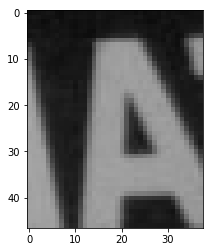

In [14]:
img=cv.imread('C:\\Users\\DELL\\Downloads\\LeNet 5\\English\\dataset\\test\A\\img001-0000067.png')
plt.imshow(img)

In [16]:
from keras.preprocessing import image
test_img=image.load_img('C:\\Users\\DELL\\Downloads\\LeNet 5\\English\\dataset\\test\A\\img001-0000067.png',target_size=(32,32))
test_immg=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=classifier.predict(test_img)
print(result)
training_set.class_indices


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35}

In [38]:
for i in np.arange(len(result[0])):
    if result[0][i] ==1:
        print(i)

10


In [ ]:
# 10=A